In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
import pprint
import random

In [2]:
fits_file = '../data/fits/1.fits'

In [5]:
hdu_list = fits.open(fits_file)
hdu_list.info()
# hdu_list.close()

Filename: ../data/fits/1.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     931   ()      
  1  SCI           1 ImageHDU        83   (5932, 5926)   float32   
  2  WHT           1 ImageHDU        44   (5932, 5926)   float32   
  3  CTX           1 ImageHDU        37   (5932, 5926)   int32   
  4  HDRTAB        1 BinTableHDU    638   10R x 314C   [9A, 3A, K, D, D, D, D, D, D, D, D, D, D, D, D, D, K, 3A, 9A, 7A, 18A, 4A, D, D, D, D, 3A, D, D, D, D, D, D, D, D, D, D, D, D, K, 8A, 23A, D, D, D, D, K, K, K, 8A, K, 23A, 9A, 20A, K, 4A, K, D, K, K, K, K, 23A, D, D, D, D, K, K, 3A, 3A, 4A, 4A, L, D, D, D, 3A, 1A, K, D, D, D, 13A, 3A, 4A, 4A, 12A, 12A, 23A, 8A, 23A, 10A, 10A, D, D, 3A, 3A, 23A, 4A, 8A, 7A, 23A, D, K, D, 6A, 9A, 8A, D, D, L, 4A, 44A, 3A, K, 5A, 7A, 3A, D, 13A, 8A, 4A, 3A, L, K, L, K, L, K, K, D, D, D, D, D, D, 3A, 1A, D, 23A, D, D, D, 3A, 23A, L, 1A, 3A, 6A, D, 3A, 6A, K, D, D, D, D, D, D, D, D, D, D, 23A, D, D, D, D, 3A, D, D,

In [6]:
image_data = hdu_list['SCI'].data

In [7]:
print('Min:', np.min(image_data))
print('Max:', np.max(image_data))
print('Mean:', np.mean(image_data))
print('Stdev:', np.std(image_data))

Min: nan
Max: nan
Mean: nan
Stdev: nan


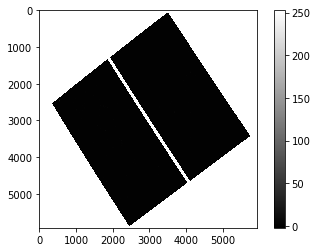

In [8]:
plt.imshow(image_data[0:, 0:], cmap='gray')
plt.colorbar()

In [9]:
image_data

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

In [11]:
imgs_arr_scaled = image_data.copy()
imgs_arr_scaled[np.isnan(imgs_arr_scaled)] = 0

In [13]:
imgs_arr_scaled

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

# FITS to jpg

In [4]:
from astropy.visualization import ZScaleInterval
from astropy.io import fits
import cv2
import numpy as np

In [16]:
# img = cv2.imread("1.jpg") #Read the image just traversed and save it as a variable named'img'
gray = cv2.cvtColor(image_data, cv2.COLOR_BGR2GRAY)#Use the cvtColor('original image', convert from RBG and BGR color space to gray space)method of the cv2 library  to convert the original image named'img' into a grayscale image and save it as a variable named'gray'

# cv2.imwrite('image2.jpg',gray) #Use the imwrite ('stored target path', variable named'gray') method of the cv2 library to write to the target path

error: OpenCV(4.6.0) d:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<3,4,-1>,struct cv::impl::A0xf2302844::Set<1,-1,-1>,struct cv::impl::A0xf2302844::Set<0,2,5>,2>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


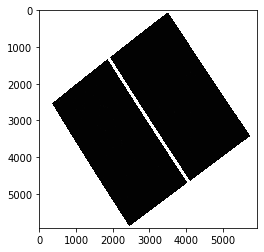

In [15]:
data = fits.getdata(fits_file) # https://fits.gsfc.nasa.gov/samples/UITfuv2582gc.fits
zscale = ZScaleInterval()
plt.imshow(zscale(data), cmap="gray")
# plt.imshow(data, cmap="gray")
# plt.savefig("asd.jpg")
plt.show()